In [1]:
import geopandas as gpd, pandas as pd, matplotlib.pyplot as plt

In [2]:
# Load GeoJSON into a GeoDataFrame
gdf = gpd.read_file('/Users/tomweatherburn/Library/CloudStorage/OneDrive-Personal/dev/tdubolyou.github.io/crime/data/Major_Crime_Indicators_Open_Data.geojson')

# Print all field names
print(gdf.columns.tolist())
print(gdf.info())

['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'geometry']
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 372899 entries, 0 to 372898
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   OBJECTID           372899 non-null  int64              
 1   EVENT_UNIQUE_ID    372899 non-null  object             
 2   REPORT_DATE        372899 non-null  datetime64[ns, UTC]
 3   OCC_DATE           372899 non-null  datetime64[ns, UTC]
 4   REPORT_YEAR        372899 non-null  int64              
 5   REPORT_MONTH       372899 non-n

<Figure size 2400x1000 with 0 Axes>

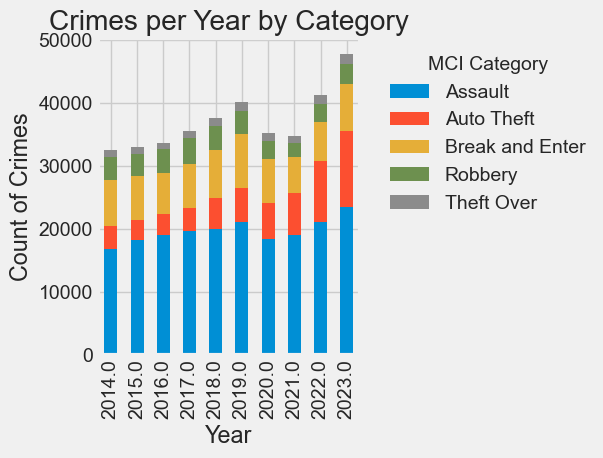

In [12]:
# Filter the GeoDataFrame for years 2014 and onward
fgdf = gdf[gdf['OCC_YEAR'] >= 2014]

# Count occurrences of categories per year
category_counts = fgdf.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)

# Use a pre-defined style
plt.style.use('fivethirtyeight')

# Plotting
plt.figure(figsize=(24, 10))
category_counts.plot(kind='bar', stacked=True)
plt.title('Crimes per Year by Category')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')

# Place the legend outside the plot to the right
plt.legend(title='MCI Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()